In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from collections import Counter
import halotools.mock_observables


%matplotlib inline

In [25]:
all_corr = {}
for i in range(10,110,10):
    sphere = np.loadtxt('/Users/forero/github/cosmo_datasets/abacus/p_{:03d}_sphere_00_stdcosmo_norsd_z0.100.dat'.format(i))
    rand_sphere = np.loadtxt('/Users/forero/github/cosmo_datasets/abacus/p_{:03d}_random_sphere_00_stdcosmo_norsd_z0.100.dat'.format(i))
    r  = np.logspace(0.5, 2, 20)
    r_center = 0.5*(r[1:]+r[:-1])
    all_corr[i] = halotools.mock_observables.tpcf(sphere, r, randoms=rand_sphere, estimator='Landy-Szalay')

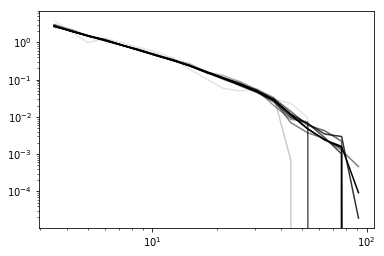

In [29]:
for i in range(10,110,10):
    plt.plot(r_center, all_corr[i], alpha=i/100, color='black')
    plt.loglog()

In [49]:
i = 10
sphere = np.loadtxt('/Users/forero/github/cosmo_datasets/abacus/p_{:03d}_sphere_00_stdcosmo_norsd_z0.100.dat'.format(i))

(-317.1242944970353, 305.7703516259415, -317.5572969617696, 326.2867281141134)

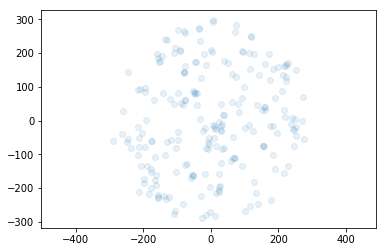

In [50]:
ii = np.abs(sphere[:,2])<5
plt.scatter(sphere[ii,0], sphere[ii,1], alpha=0.1)
plt.axis('equal')

In [88]:
all_vpf = {}
all_rnd_vpf = {}
for i in range(10,110,10):
    sphere = np.loadtxt('/Users/forero/github/cosmo_datasets/abacus/p_{:03d}_sphere_00_stdcosmo_norsd_z0.100.dat'.format(i))
    rand_sphere = np.loadtxt('/Users/forero/github/cosmo_datasets/abacus/p_{:03d}_random_sphere_00_stdcosmo_norsd_z0.100.dat'.format(i))
    r  = np.linspace(2, 30, 40)
    r_center = 0.5*(r[1:]+r[:-1])
    all_vpf[i] = halotools.mock_observables.void_prob_func(sphere, r, int(1e5))
    all_rnd_vpf[i] = halotools.mock_observables.void_prob_func(rand_sphere, r, int(1e5))

In [105]:
filename = 'void_probability_function_sphere_00.dat'
out = open(filename, 'w')
for i in range(10,110,10):
    for a in all_vpf[i]:
        out.write("{:.4e} ".format(a))
    out.write("\n")
out.close()

filename = 'void_probability_function_random.dat'
out = open(filename, 'w')
for i in range(10,110,10):
    for a in all_rnd_vpf[i]:
        out.write("{:.4e} ".format(a))
    out.write("\n")
out.close()

filename = 'void_probability_function_radii.dat'
out = open(filename, 'w')
for a in r:
    out.write("{:.4e} ".format(a))
out.write("\n")
out.close()